In [2]:
import os

os.chdir("/home/andre/SmartBinAnalysis/Deliverables")

Loaded Containers -- > Creating
Container 10077 Collections and Measures do not intersect
Created Containers -- > Processing Metrics
Processed 1 of 340 containers
Processed 18 of 340 containers
Processed 35 of 340 containers
Processed 52 of 340 containers
Processed 69 of 340 containers
Processed 86 of 340 containers
Processed 103 of 340 containers
Processed 120 of 340 containers
Processed 137 of 340 containers
Processed 154 of 340 containers
Processed 171 of 340 containers
Processed 188 of 340 containers
Processed 205 of 340 containers
Processed 222 of 340 containers
Processed 239 of 340 containers
Processed 256 of 340 containers
Processed 273 of 340 containers
Processed 290 of 340 containers
Processed 307 of 340 containers
Processed 324 of 340 containers
Processed


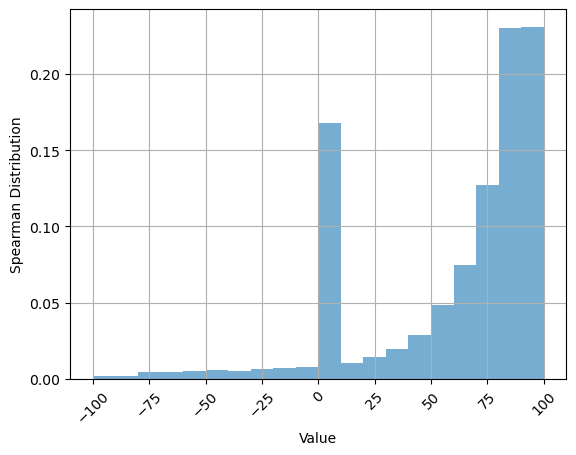

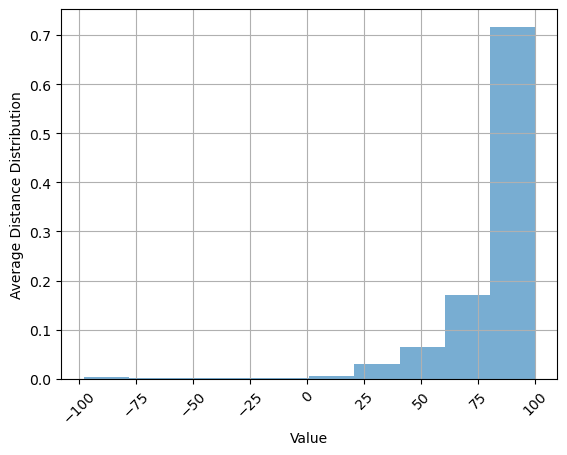

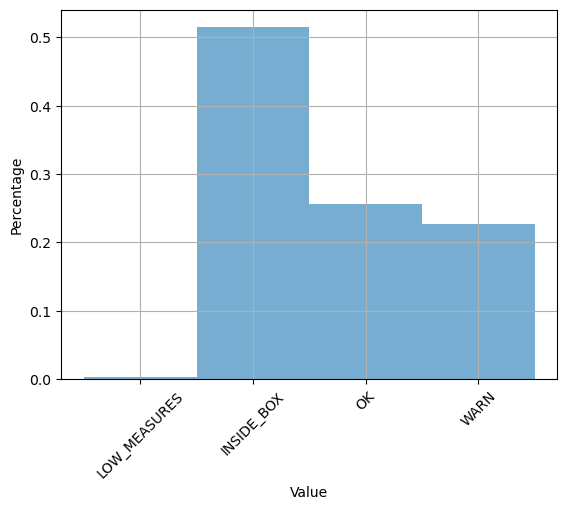

Fixing Start
Processed 1 of 340 containers
Processed 18 of 340 containers
Processed 35 of 340 containers
Processed 52 of 340 containers
Processed 69 of 340 containers
Processed 86 of 340 containers
Processed 103 of 340 containers
Processed 120 of 340 containers
Processed 137 of 340 containers
Processed 154 of 340 containers
Processed 171 of 340 containers
Processed 188 of 340 containers
Processed 205 of 340 containers
Processed 222 of 340 containers
Processed 239 of 340 containers
Processed 256 of 340 containers
Processed 273 of 340 containers
Processed 290 of 340 containers
Processed 307 of 340 containers
Processed 324 of 340 containers


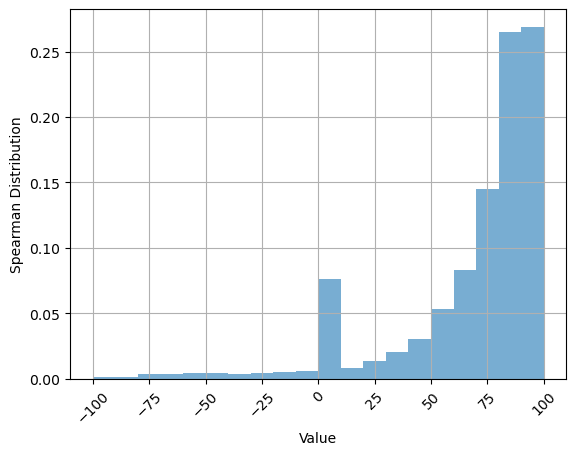

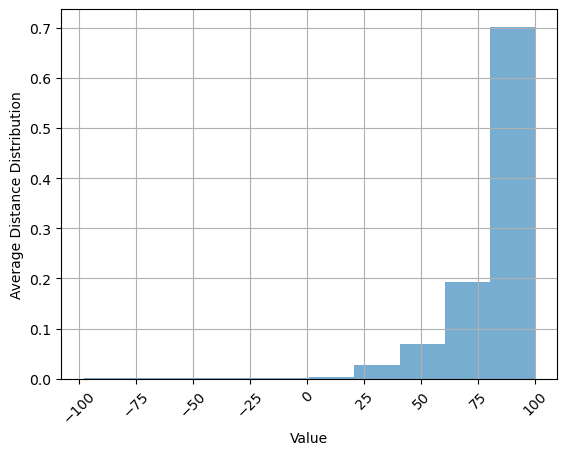

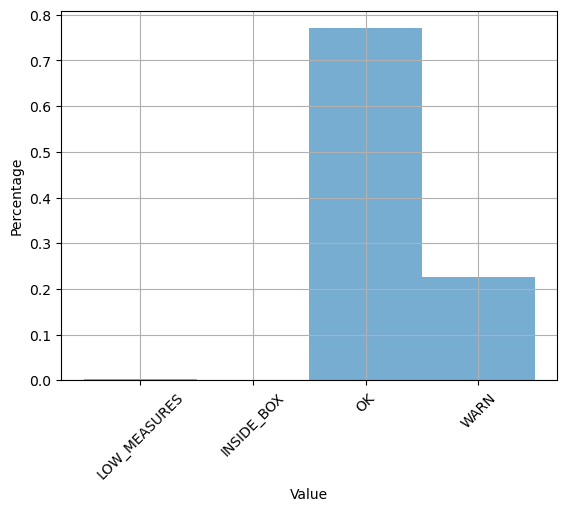

Fixing Containers
Processed 1 of 340 containers
Processed 18 of 340 containers
Processed 35 of 340 containers
Processed 52 of 340 containers
Processed 69 of 340 containers
Processed 86 of 340 containers
Processed 103 of 340 containers
Processed 120 of 340 containers
Processed 137 of 340 containers
Processed 154 of 340 containers
Processed 171 of 340 containers
Processed 188 of 340 containers
Processed 205 of 340 containers
Processed 222 of 340 containers
Processed 239 of 340 containers
Processed 256 of 340 containers
Processed 273 of 340 containers
Processed 290 of 340 containers
Processed 307 of 340 containers
Processed 324 of 340 containers


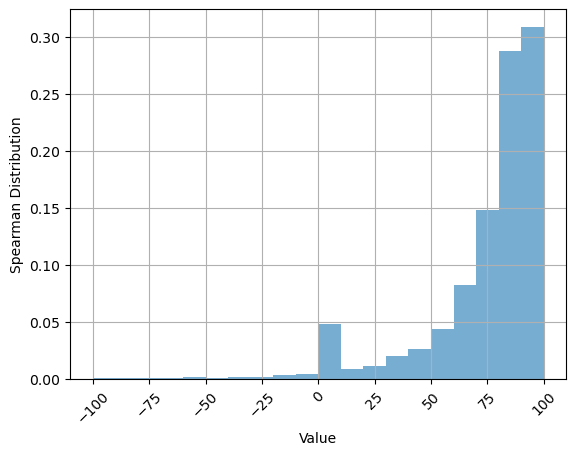

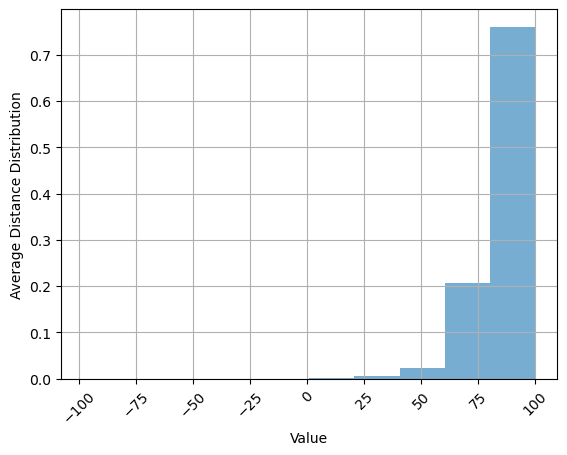

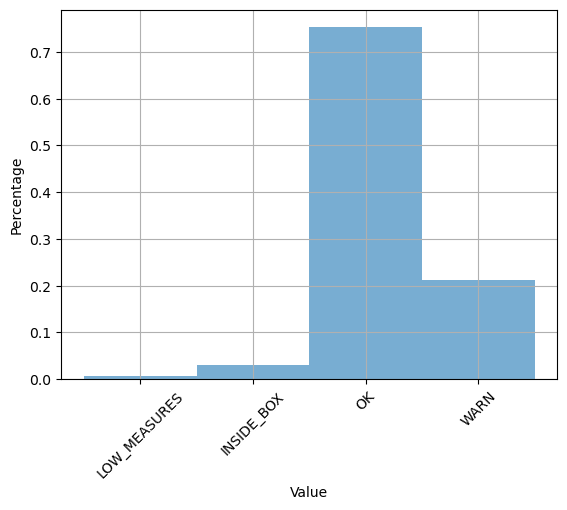

In [4]:
from copy import deepcopy

import extract as e
import save_load as sl
import transform as t
from Container import TAG, Container

PATH = "home/andre/SmartData/"
FILEs = "Enchimentos_de_Sensores[RioMaior].csv"
FILEd = "Enchimentos_com_Recolhas[RioMaior].csv"

fill_df, _ = e.import_same_file(FILEs,
                                    collect_id_header = "idrecolha",
                                    sep               = ';', 
                                    path              = PATH, 
                                    print_first_line  = False)

_, rec_df = e.import_same_file(FILEd,
                                    collect_id_header = "idrecolha",
                                    sep               = ';', 
                                    path              = PATH, 
                                    print_first_line  = False)

fill, collect, info = e.pre_process_data(
                                    df_fill             = fill_df, 
                                    df_collection       = rec_df,
                                    id_header_fill      = "idcontentor",
                                    date_header_fill    = "Data da leitura",
                                    date_format_fill    = "%Y-%m-%d %H:%M:%S.%f",
                                    fill_header_fill    = "Enchimento",
                                    id_header_collect   = "idcontentor",
                                    date_header_collect = "Data da leitura",
                                    date_format_collect = "%Y-%m-%d %H:%M:%S.%f",
                                )

print("Loaded Containers -- > Creating")

container_dict, ids = e.container_global_sorted_wrapper(fill,collect, info)

print("Created Containers -- > Processing Metrics")

t.pre_process_container_metrics(container_dict)

print("Processed")

t.view_metrics(container_dict, box_window=7, mv_thresh = 50, min_days = 30, use = 'spear')

print("Fixing Start")

step = len(container_dict)//20
thresh = 0
i = 0

container_fixed_start = deepcopy(container_dict)

container:Container
for id, container in container_fixed_start.items():
    
    tag = container.get_tag(window = 7, mv_thresh = 50, min_days = 30, use = "spear")
    dvar = 0

    if tag == TAG.INSIDE_BOX:

        container.clean_box(window = 7, mv_thresh = 50, use = "spear")
        tag = container.get_tag(window = 7, mv_thresh = 50, min_days = 30, use = "spear")

    container_fixed_start[id] = container

    i+= 1
    if(i > thresh):
        print( f"Processed {i} of {len(container_dict)} containers")
        thresh += step

t.view_metrics(container_fixed_start, box_window=7, mv_thresh = 50, min_days = 30, use = 'spear')


print("Fixing Containers")

step = len(container_dict)//20
thresh = 0
i = 0

container:Container
for id, container in container_dict.items():
    _, _, container_dict[id] = t.fix_collections_sensor(
                                                        container,
                                                        box_window   = 7,
                                                        mv_thresh    = 50,
                                                        min_days     = 30,
                                                        max_fill     = 24,
                                                        dist_thresh  = 70,
                                                        c_trash      = 24,
                                                        var_thresh   = 0.01,
                                                        spear_thresh = 60,
                                                        use          = "spear")
    i+= 1
    if(i > thresh):
        print( f"Processed {i} of {len(container_dict)} containers")
        thresh += step

t.view_metrics(container_dict, box_window=7, mv_thresh = 50, min_days = 30, use = 'spear')

In [7]:
container_dict.keys()

dict_keys([192, 197, 470, 629, 754, 787, 892, 894, 904, 991, 995, 1018, 1055, 1116, 1170, 1171, 1172, 1173, 1298, 1299, 1300, 1399, 1410, 1459, 1527, 1606, 1610, 1621, 1655, 1715, 1856, 1866, 1875, 2171, 2321, 2336, 2503, 2508, 2526, 2609, 2684, 2747, 2750, 2852, 2853, 2946, 3133, 3137, 3151, 3224, 3264, 3315, 3317, 3336, 3340, 3419, 5525, 5642, 5673, 5730, 5752, 5814, 5815, 5930, 5931, 5933, 5937, 5938, 5977, 6046, 6092, 6221, 6224, 6225, 6227, 6228, 6230, 6233, 6236, 6237, 6240, 6900, 6901, 6902, 6904, 6906, 6909, 6911, 6915, 7244, 7245, 7246, 7247, 7251, 7252, 7253, 7361, 7402, 7445, 7597, 7612, 7702, 7733, 7945, 7947, 7948, 8136, 9419, 9545, 9579, 9594, 9643, 9660, 9787, 9879, 9963, 10037, 10073, 10078, 10079, 10081, 10083, 10085, 10091, 10092, 10095, 10103, 10105, 10112, 10114, 10121, 10127, 10130, 10132, 10133, 10134, 10138, 10139, 10142, 10143, 10149, 10150, 10151, 10152, 10153, 10157, 10158, 10161, 10163, 10164, 10165, 10166, 10167, 10168, 10170, 10171, 10172, 10173, 10174, 101

In [3]:
sl.save_id_containers(ids, path=PATH, name = "ids.csv")

In [4]:
PATH = "home/andre/SmartSensro2024"

container:Container
for id, container in container_dict.items():
    sl.save_container_structured(id, container, path=PATH, ver="_Corrected_with_metrics")

OK_Containers = t.filter_containers(containers_dict=container_dict)

container:Container
for id , container in OK_Containers.items():
    sl.save_rate_series(id=id, container=container, rate_type='crude', freq='1D', path=PATH) 

ids = list(OK_Containers.keys())

sl.save_id_containers(ids, path=PATH, name = "Rate_Ids")
